## How can we represent dataframes as python objects?

In [134]:
people = {
    "first": ['Jack', 'James', 'Liam'],
    "last": ['Simons', 'Kabby', 'Payne'],
    "email":['jsim@demo.com', 'jkab@demo.com', 'lpayne@demo.com']
}

people["first"]

['Jack', 'James', 'Liam']

In [135]:
# creating a dataframe from the above object

In [154]:
import pandas as pd
# creating a dataframe from the dict
df = pd.DataFrame(people)
df

,first,last,email
0,Jack,Simons,jsim@demo.com
1,James,Kabby,jkab@demo.com
2,Liam,Payne,lpayne@demo.com


In [137]:
# accessing data of the dataframe
df['email']
# ^ returns a series
# Alternative:
df.email 

0      jsim@demo.com
1      jkab@demo.com
2    lpayne@demo.com
Name: email, dtype: object

In [138]:
type(df['email'])

pandas.core.series.Series

# Dataframes - rows and columns
# Series - rows of a single column

In [139]:
# accessing multiple col.s at once
df[['last', 'email']]
# ^ the return is not a series but another filtered dataframe
# ! Whenever we add a dataframe and assign that into some var, that df object
# would have col names as attrs and we can access a series bu using the name after a dot
# ! Also, the item naming is case sensitive 

,last,email
0,Simons,jsim@demo.com
1,Kabby,jkab@demo.com
2,Payne,lpayne@demo.com


In [140]:
df.columns
# ^ grabbing col.s

Index(['first', 'last', 'email'], dtype='object')

# iloc()

In [141]:
# getting rows
df.iloc[0] 

# gettin multiple rows
df.iloc[[0, 1], 0] # <- allowing to get col.s as well
# enables us to access rows by an int location
# whenever we are using slicing, the right one is exclusive

0     Jack
1    James
Name: first, dtype: object

# We could also use a slicing with a dframe but that's not clear. So, just use iloc()

In [142]:
df.iloc[0:2, :]  

,first,last,email
0,Jack,Simons,jsim@demo.com
1,James,Kabby,jkab@demo.com


# loc()


In [143]:
df.loc[0]
# ^ searching by the label
# since the 0 was passed, we have gotten the 1st row 

# getting multiple rows
df.loc[[0, 1], ['email', 'last']] 
# we pass the list of labels to get multiple col.s as well 
# ^ the list is also possible with the "iloc()"
# the order can be changed

,email,last
0,jsim@demo.com,Simons
1,jkab@demo.com,Kabby


## !!! We can use a list slicing with loc() and the last value for that would be inclusive 

## Also, we don't use []s around them

<h3>For.e:</h3> <h4><em>df.loc[0:2, 'Hobbyist':'LanguageWorkedWith']</em></h4

<hr></hr>

# Loading CSV file (SURVEY)

In [144]:
import pandas as pd

In [145]:
df = pd.read_csv('../../DevSurvey2020/survey_results_public.csv')
schema_df = pd.read_csv('../../DevSurvey2020/survey_results_schema.csv')

In [146]:
pd.set_option('display.max_columns', 61)
pd.set_option('display.max_rows', 61)

In [147]:
df.head(10) 

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [148]:
df.sample(n=3, random_state=42) 
# getting the # of random rows
# random_state -> for reproducibility
# ^ If you pass it an integer, it will use this as a seed 
# -for a pseudo random number generator. As the name already says, 
# -the generator does not produce true randomness. It rather has 
# -an internal state (that you can get by calling np.random.get_state()) 
# -which is initialized based on a seed. When initialized by the same seed, 
# -it will reproduce the same sequence of "random numbers".

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
61284,62521,I am a developer by profession,Yes,28.0,20,Yearly,85000.0,85000.0,United States,United States dollar,USD,NaN,MySQL,"Developer, back-end;Developer, front-end;Devel...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,"I’m not actively looking, but I am open to new...",HTML/CSS;JavaScript;Rust;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript,Node.js,NaN,Github;Gitlab;Slack;Trello,Slack,No,Somewhat important,Fairly important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Once every few years,Not sure,No,No,Sometimes: 1-2 days per month but less than we...,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who code...,Meditate;Call a coworker or friend;Visit Stack...,Linux-based,20 to 99 employees,NaN,NaN,I have some influence,Straight / Heterosexual,No,Neutral,NaN,A few times per week,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;Vue.js,jQuery;Vue.js,Just as welcome now as I felt last year,40.0,8,5
27767,27871,I am a developer by profession,Yes,22.0,16,Monthly,80000.0,960000.0,United States,United States dollar,USD,Redis,MongoDB;MySQL,"Developer, full-stack;Developer, QA or test","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Southeast Asian,Man,Industry that I’d be working in;Flex time or a...,Very satisfied,"I’m not actively looking, but I am open to new...",C;Rust,HTML/CSS;JavaScript,.NET;.NET Core;Node.js,Node.js,NaN,Confluence;Jira;Github;Slack;Microsoft Teams,Yes,Somewhat important,Fairly important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Every few months,No,Yes,No,Rarely: 1-2 days per year or less,Ask developers I know/work with,Indifferent,Stack Overflow (public Q&A for anyone who code...,Play games;Visit Stack Overflow;Watch help / t...,MacOS,100 to 499 employees,NaN,AWS;Linux;MacOS,I have some influence,Straight / Heterosexual,No,"No, not really",NaN,Daily or almost daily,Easy,Appropriate in length,No,Web development or web design,ASP.NET;ASP.NET Core,Angular;React.js,Just as welcome now as I felt last year,40.0,6,1
43373,44201,I am a developer by profession,Yes,39.0,18,Weekly,870.0,43500.0,United States,United States dollar,USD,Elasticsearch;Firebase;MariaDB;MongoDB,NaN,"Developer, front-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed part-time,White or of European descent,Woman,"Languages, frameworks, and other technologies ...",Very dissatisfied,I am actively looking for a job,PHP,HTML/CSS;JavaScript;PHP;Ruby,Flutter;Node.js;React Native;TensorFlow;Torch/...,.NET;Node.js,NaN,Confluence;Jira;Github;Slack;Trello;Google Sui...,Not sure,Extremely important,Not at all important/not necessary,Better compensation;Trouble with leadership at...,"Read company media, such as employee blogs or ...",Every few months,No,Onboarding? What onboarding?,Yes,Sometimes: 1-2 days per month but less than we...,NaN,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit

In [149]:
df.sample(frac=0.75, random_state=99)
# ^ getting the fraction(%) of rows

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
21809,21894,I am a developer by profession,Yes,24.0,21,Monthly,485.0,5820.0,India,United States dollar,USD,MariaDB;MySQL;PostgreSQL;Redis,MariaDB;MySQL;PostgreSQL;Redis,"Database administrator;Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Man,"Flex time or a flexible schedule;Languages, fr...",Very satisfied,I am actively looking for a job,HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;SQL,NaN,NaN,Github;Slack;Stack Overflow for Teams,Github;Slack;Stack Overflow for Teams,Yes,Extremely important,Very important,Better compensation,"Read company media, such as employee blogs or ...",Once a year,No,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,Start a free trial,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Watch help / tutorial vid...,Linux-based,20 to 99 employees,Linux,Linux,I have a great deal of influence,NaN,Yes,"Yes, definitely",Daily or almost daily,Multiple times per day,Difficult,Too long,No,"Computer science, computer engineering, or sof...",jQuery,jQuery,A lot more welcome now than last year,45.0,24,3
9898,9931,I am a developer by profession,No,28.0,17,Yearly,66000.0,71345.0,Germany,European Euro,EUR,Couchbase;DynamoDB;PostgreSQL;Redis,MySQL;PostgreSQL;Redis,"Developer, full-stack;DevOps specialist","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Hispanic or Latino/a/x;Multiracial,Man,"Languages, frameworks, and other technologies ...",Very satisfied,"I’m not actively looking, but I am open to new...",Bash/Shell/PowerShell;Go;Java;JavaScript,Bash/Shell/PowerShell;Go;Java;JavaScript;Kotli...,Node.js;Teraform,Ansible;Node.js;Teraform,Github;Gitlab;Slack;Microsoft Azure;Google Sui...,Jira;Github;Gitlab;Slack;Microsoft Teams;Micro...,Yes,Extremely important,Not at all important/not necessary,Wanting to share accomplishments with a wider ...,"Read company media, such as employee blogs or ...",Every few months,Yes,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,Start a free trial;Ask developers I know/work ...,Annoyed,Stack Overflow (public Q&A for anyone who code...,Meditate;Call a coworker or friend;Visit Stack...,MacOS,500 to 999 employees,AWS;Docker;Kubernetes;Linux;Slack Apps and Int...,AWS;Docker;Google Cloud Platform;Kubernetes;Li...,I have some influence,Straight / Heterosexual,Yes,"No, not at all",I have never participated in Q&A on Stack Over...,A few times per week,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular,Angular;Spring,Just as welcome now as I felt last year,40.0,12,6
24189,24280,I am a developer by profession,Yes,26.0,11,Yearly,1500000.0,20943.0,India,Indian rupee,INR,Cassandra;DynamoDB;Elasticsearch;Microsoft SQL...,MySQL;Oracle;SQLite,Data or business analyst;Data scientist or mac...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,South Asian,Man,"Languages, frameworks, and other technologies ...",Neither satisfied nor dissatisfied,"I’m not actively looking, but I am open to new...",Java;Python;R;Scala;SQL,C++;HTML/CSS;Java;Python;R;Scala;SQL,Apache Spark;Hadoop;Keras;Pandas;TensorFlow;To...,Apache Spark;Hadoop,Jira;Github;Microsoft Azure

In [150]:
df.shape

(64461, 61)

In [151]:
df.loc[0:2, 'Hobbyist':'Employment']

,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment
0,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em..."
1,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
2,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# getting 'yes' and 'no' counts
df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [35]:
df.CurrencyDesc.unique()

array(['European Euro', 'Pound sterling', nan, 'Albanian lek',
       'United States dollar', 'Indian rupee', 'Canadian dollar',
       'Australian dollar', 'Brazilian real', 'Mexican peso',
       'Swedish krona', 'Polish zloty', 'Indonesian rupiah',
       'Israeli new shekel', 'Czech koruna',
       'Bosnia and Herzegovina convertible mark', 'Bulgarian lev',
       'Ukrainian hryvnia', 'Swiss franc', 'Hungarian forint',
       'Nepalese rupee', 'Uruguayan peso', 'Pakistani rupee',
       'Nigerian naira', 'Turkish lira', 'Philippine peso',
       'Peruvian sol', 'Sri Lankan rupee', 'New Taiwan dollar',
       'Kyrgyzstani som', 'Croatian kuna', 'Argentine peso',
       'Russian ruble', 'Iranian rial', 'Ghanaian cedi',
       'Norwegian krone', 'Moroccan dirham', 'Romanian leu',
       'Tunisian dinar', 'Haitian gourde', 'Colombian peso',
       'Honduran lempira', 'Danish krone', 'Lebanese pound',
       'Ugandan shilling', 'Serbian dinar', 'Guatemalan quetzal',
       'Syrian pound

In [36]:
df.CurrencyDesc.nunique()
# ^ the # of unique values

142

# Cross tabulation


In [38]:
pd.crosstab(df.CurrencyDesc, df.Country)
# ^ a tally account of how many people belong to each combination of currency and country

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,...,South Korea,Spain,Sri Lanka,Sudan,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe
CurrencyDesc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghan afghani,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albanian lek,2,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Algerian dinar,0,0,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Angolan kwanza,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Argentine peso,0,0,0,1,0,1,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West African CFA franc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemeni rial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zambian kwacha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,8,0


In [57]:
%matplotlib inline

<AxesSubplot:>

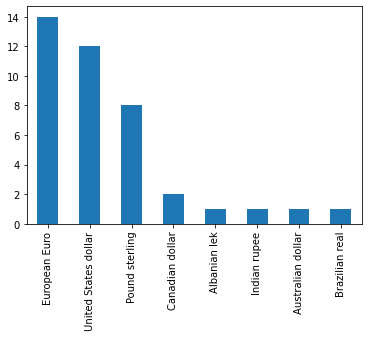

In [58]:
df.CurrencyDesc.head(50).value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

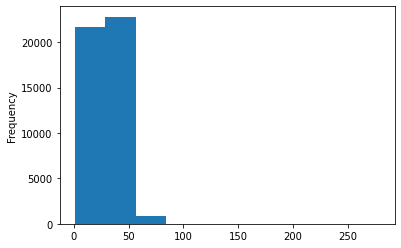

In [64]:
df.Age.plot(kind='hist')

# Train test split (ML)

In [115]:
train = df.sample(frac=0.75, random_state=99)
# we don't have to use the rest by saying 0.25 coz that's another set of random 
# rows and they would also overlap

In [125]:
test =df.loc[~df.index.isin(train.index), :]
test.set_index('Respondent', inplace=True)
train.set_index('Respondent', inplace=True)

In [130]:
test.loc[14, :]

MainBranch                                         I am a developer by profession
Hobbyist                                                                      Yes
Age                                                                          27.0
Age1stCode                                                                     13
CompFreq                                                                   Yearly
CompTotal                                                                 66000.0
ConvertedComp                                                             66000.0
Country                                                             United States
CurrencyDesc                                                 United States dollar
CurrencySymbol                                                                USD
DatabaseDesireNextYear                              Firebase;Microsoft SQL Server
DatabaseWorkedWith                                  Firebase;Microsoft SQL Server
DevType         

In [133]:
train.loc[14, :]

KeyError: 14

## Ways of creating dframes:
<ul> 
<li><strong>From a dictionary:</strong> pd.DataFrame({"..."}, columns=['...',], index=['...',])<br>
    columns -- spec the ordering of col.s<br>
    index   -- spec the index 
    <li><strong>From a list of lists:</strong> pd.DataFrame([[".", "."],[".", "."],[".", "."],] <br>
        each of the inner lists are treated as single rows<br>
        we can also spec the index and col.s
        <li><strong></strong>
            <li><strong></strong>
                <li><strong></strong>
</ul>        

## From a "numpy" array:

In [155]:
import numpy as np


In [159]:
arr = np.random.rand(4, 2)
# random number functionality
# a 4x2 numpy array is created of random nums between 0 and 1
arr

array([[0.8436627 , 0.56467052],
       [0.51782328, 0.79486419],
       [0.22197239, 0.91335118],
       [0.68488576, 0.3596181 ]])

In [161]:
pd.DataFrame(arr)
# we can name col.s as well

,0,1
0,0.843663,0.564671
1,0.517823,0.794864
2,0.221972,0.913351
3,0.684886,0.359618


In [ ]:
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)})
# np.arange 
#           -- array range; outputs a numpy array
#           -- params: 2nd is exclusive and the 3rd is the step

# np.random.randint
#           -- random integers
#           -- params: 3rd -- # of them

# at the end, we can use .set_index('name... ') for setting the index

## Create a Series and attach that into Dframe obj

In [162]:
pd.Series(['round', 'square'], index = ['c', 'b'], name='shape')

c     round
b    square
Name: shape, dtype: object

### When attached, the series name would be the col name, the series is alligned to the dframe by the index 

### The attachment is done by using the pd.concat([], ...)